In [10]:
pip install kaldialign

In [11]:
import csv
from kaldialign import align
from kaldialign import edit_distance

tsv_file = open("lexicon_comparison.tsv")
read_tsv = csv.reader(tsv_file, delimiter="\t")
total_phonemes = 0
error_ins = 0
error_del = 0
error_sub = 0
error_count = 0

for row in read_tsv:
  phonemes_mlphon = row[1].split(" ")
  phonemes_gold = row[2].split(" ")
  total_phonemes += len(phonemes_gold)
  results = edit_distance(phonemes_gold, phonemes_mlphon)
  if results["total"] > 0 :
    error_ins += results["ins"]
    error_del += results["del"]
    error_sub += results["sub"]
    error_count += results["total"]
    print(row[0], row[1])
print("Total Phonemes: ",total_phonemes)
print("Phonemes deleted:", error_del)
print("Phonemes Inserted:", error_ins)
print("Phonemes Substituted:", error_sub)
print("Phoneme Error Rate", error_count*100/total_phonemes)

തന്നെ t̪ a n̪ n̪ e
എസ് e s ə
പിന്നെ p i n̪ n̪ e
പിന്നീട് p i n̪ n̪ iː ʈ ə
മുന്നിൽ m u n̪ n̪ i l
തന്നെയാണ് t̪ a n̪ n̪ e j aː ɳ ə
എന്നെ e n̪ n̪ e
തോമസ് t̪ oː m a s ə
എഫ് e f ə
പിന്നിൽ p i n̪ n̪ i l
പിന്നാലെ p i n̪ n̪ aː l e
ജോസഫ് ɟ oː s a f ə
ജോർജ് ɟ oː r ɟ ə
നമ്പർ n̪ a m p a r
സുരേഷ് s u ɾ eː ʂ ə
രമേശ് ɾ a m eː ʃ ə
നവംബർ n̪ a ʋ a m b a r
മുന്നറിയിപ്പ് m u n̪ n̪ a r i j i p p ə
യുഡിഎഫ് j u ɖ i e f ə
ജോസ് ɟ oː s ə
എച്ച് e t͡ʃ t͡ʃ ə
ചെന്നിത്തല t͡ʃ e n̪ n̪ i t̪ t̪ a l a
നു n̪ u
മുന്നോട്ടു m u n̪ n̪ oː ʈ ʈ u
ആർഎസ്എസ് aː r e s ə e s ə
Total Phonemes:  6762
Phonemes deleted: 0
Phonemes Inserted: 12
Phonemes Substituted: 25
Phoneme Error Rate 0.5471753918958888


Classification report : 
               precision    recall  f1-score   support

           #       0.00      0.00      0.00        12
           a       1.00      1.00      1.00      1125
         ai̯       1.00      1.00      1.00        16
         au̯       1.00      1.00      1.00         4
          aː       1.00      1.00      1.00       267
           b       1.00      1.00      1.00        29
          bʱ       1.00      1.00      1.00        26
          d̪       1.00      1.00      1.00        53
         d̪ʱ       1.00      1.00      1.00        34
           e       1.00      1.00      1.00       206
          eː       1.00      1.00      1.00        97
           f       1.00      1.00      1.00        12
           i       1.00      1.00      1.00       503
          iː       1.00      1.00      1.00        48
           j       1.00      1.00      1.00       207
           k       1.00      1.00      1.00       308
          kʰ       1.00      1.00      1.00         9
 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


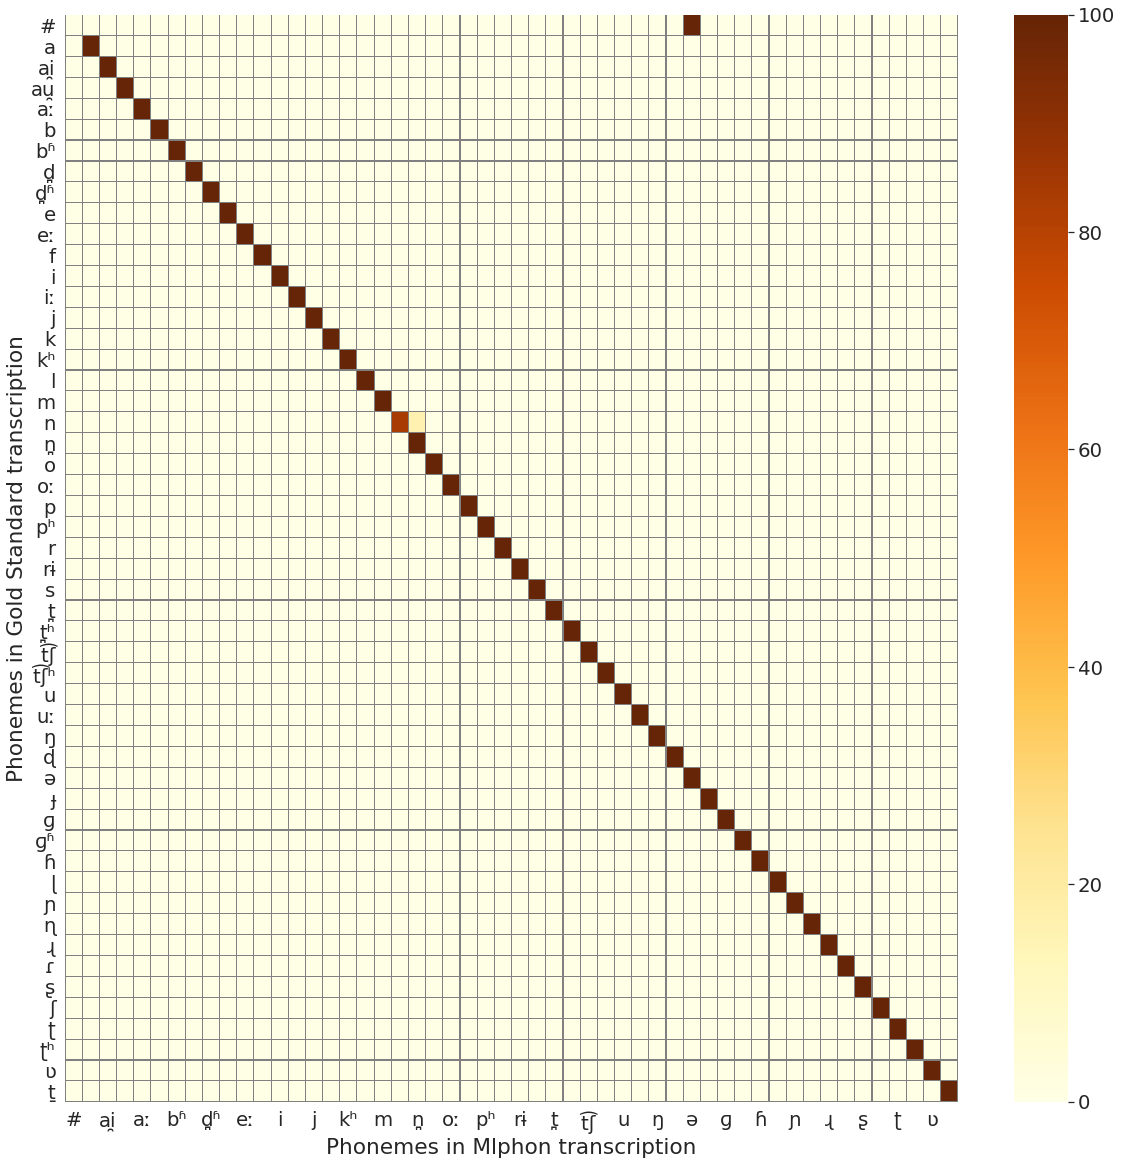

In [12]:
import csv
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import seaborn as sn
import pandas as pd
import numpy as np
from kaldialign import align
import matplotlib.pyplot as plt # for data visualization
tsv_file = open("lexicon_comparison.tsv")
read_tsv = csv.reader(tsv_file, delimiter="\t")
gold = []
mlphon = []
count = 0
for row in read_tsv:
  count = count + 1
  phonemes_mlphon = row[1].split(" ")
  phonemes_gold = row[2].split(" ")
  ali = align(phonemes_mlphon, phonemes_gold, '#')
  for pair in ali:
    gold.append(pair[1])
    mlphon.append(pair[0])
  if count>1000:
    break
class_names = np.unique(gold)
# confusion matrix
matrix = classification_report(gold,mlphon)
print('Classification report : \n',matrix)
cm = confusion_matrix(gold, mlphon)
dem=cm.sum(axis=1)
print(dem)
cm=cm*100/ dem[:,None]
# print(cm)
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
plt.figure(figsize=(20,20))
sn.set(font_scale=1.8)
ax = sn.heatmap(cm_df, annot=False, cmap="YlOrBr", linewidths=.1, linecolor='grey')
ax.set(#title="Evaluation of Mlphon with Gold Standard Transcript",
      xlabel="Phonemes in Mlphon transcription",
      ylabel="Phonemes in Gold Standard transcription")
plt.savefig("output.jpg")

[[ 104    1]
 [   8 1637]]
[ 105 1645]
[[99.04761905  0.95238095]
 [ 0.48632219 99.51367781]]


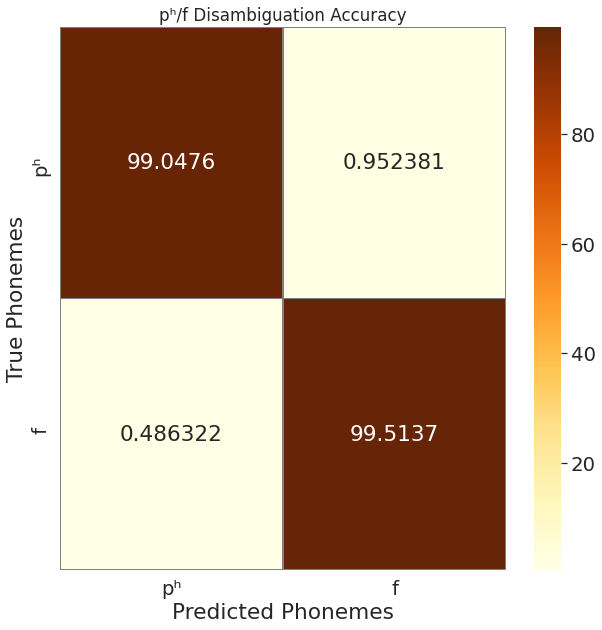

In [13]:
class_names = ['pʰ', 'f']
cm = np.array(
[[104,1],
 [8,1637]])
print(cm)

dem=cm.sum(axis=1)
print(dem)
cm=cm*100/ dem[:,None]
print(cm)
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
plt.figure(figsize=(10,10))
ax = sn.heatmap(cm_df, annot=True, cmap="YlOrBr", linewidths=1, linecolor='gray', fmt='g')
sn.set(font_scale=1.4)
ax.set(title="pʰ/f Disambiguation Accuracy",
      xlabel="Predicted Phonemes",
      ylabel="True Phonemes",)
plt.savefig("fa.jpg")
